## **Brain Tumor Classification Using CNN**

In [1]:
import tensorflow as tf
import pickle
import numpy as np
from model import TumorClassifier

2023-05-02 17:24:57.667882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
### ONLY RUN IF YOU WANT TO OVERRIDE PREVIOUSLY SAVE MODEL WEIGHTS ###

# Current saved model was trained for 5 epochs and had a Test Accuracy of 48%

# Training New Model
# %run main.py

Epoch:  1


Training loss for Batch 21: 1.0154: 100%|██████████| 22/22 


Test Accuracy:  0.30710658
Epoch:  2


Training loss for Batch 21: 0.7848: 100%|██████████| 22/22 


Test Accuracy:  0.3857868
Epoch:  3


Training loss for Batch 21: 0.7305: 100%|██████████| 22/22 


Test Accuracy:  0.35025382
Epoch:  4


Training loss for Batch 21: 0.6046: 100%|██████████| 22/22 


Test Accuracy:  0.40862945
Epoch:  5


Training loss for Batch 21: 0.5333: 100%|██████████| 22/22 


Test Accuracy:  0.48477158


In [30]:
### Load Data
with open("train.pickle", "rb") as file:
    X_train = tf.cast(pickle.load(file), dtype=tf.float64)
    Y_train = tf.cast(pickle.load(file), dtype=tf.int64)

with open("test.pickle", "rb") as file:
    X_test = tf.cast(pickle.load(file), dtype=tf.float64)
    Y_test = tf.cast(pickle.load(file), dtype=tf.int64)

Y_train = tf.expand_dims(Y_train, 1)
Y_test = tf.expand_dims(Y_test, 1)

### Loading in Model
model = TumorClassifier()
model(X_test[0:1]) # Calls model to initialize weights

model.load_weights('final_weights.h5')

True: 2
Pred: 2


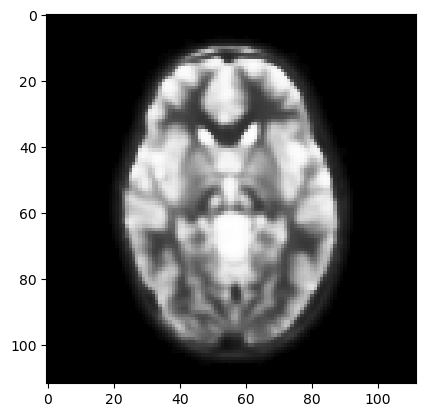

True: 2
Pred: 2


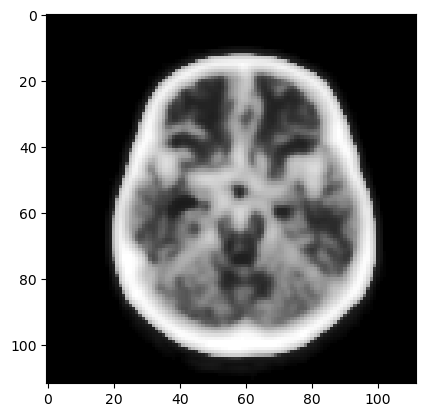

True: 1
Pred: 1


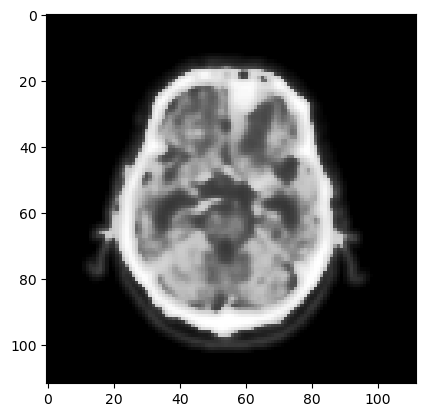

True: 0
Pred: 2


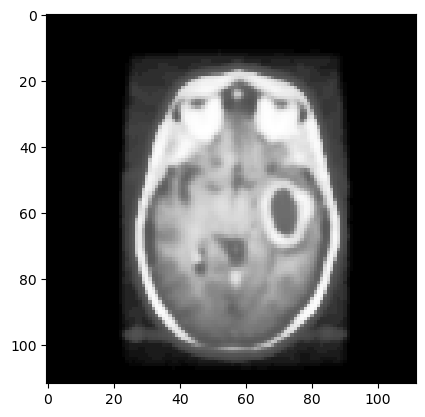

True: 1
Pred: 1


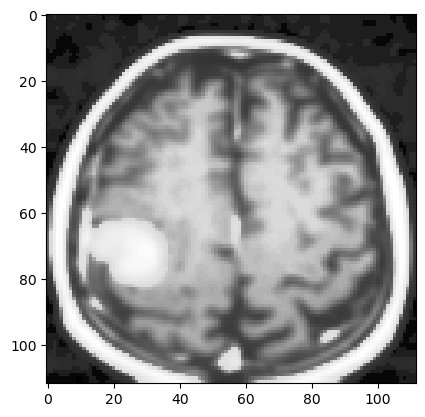

In [31]:
import matplotlib.pyplot as plt

for i in np.random.randint(0, 394, 5):
    # Show the tensor as an image using Matplotlib
    print('True:', Y_test[i].numpy()[0])
    print('Pred:', np.argmax(model(X_test[i:i+1], False)))
    plt.imshow(X_test[i], cmap='gray')
    plt.show()

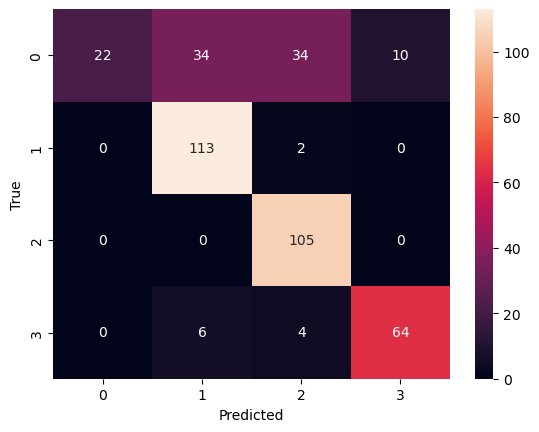

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming predicted and true values are in arrays pred and true respectively
confusion = confusion_matrix(Y_test, np.argmax(model(X_test, False),1))

# Visualize the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

True: 0
Pred: 0


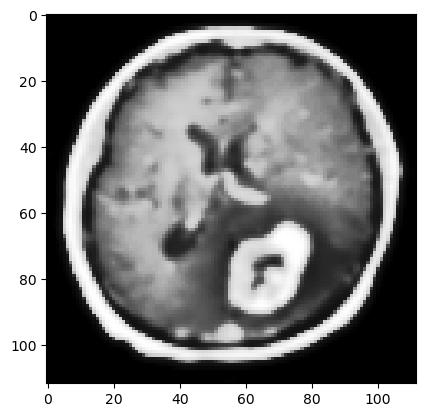

True: 0
Pred: 0


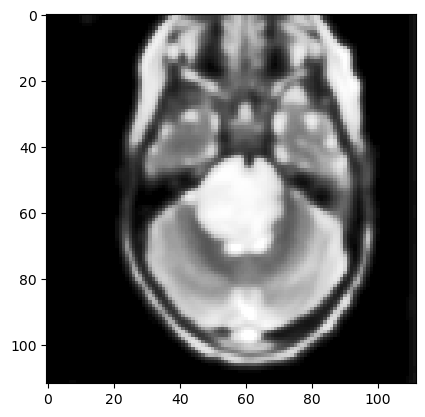

True: 0
Pred: 0


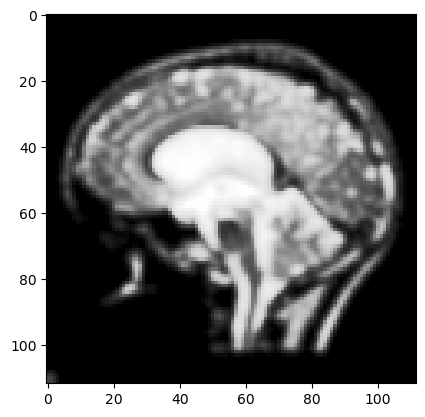

True: 0
Pred: 0


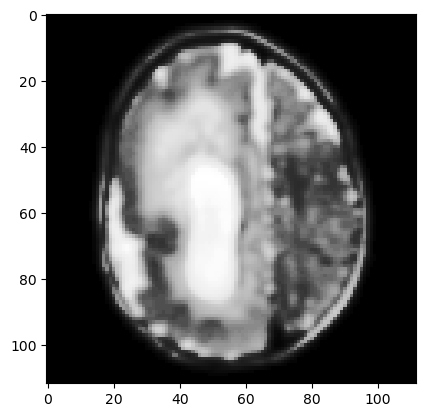

True: 0
Pred: 0


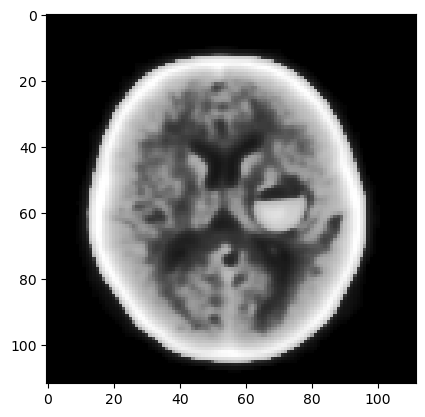

True: 0
Pred: 0


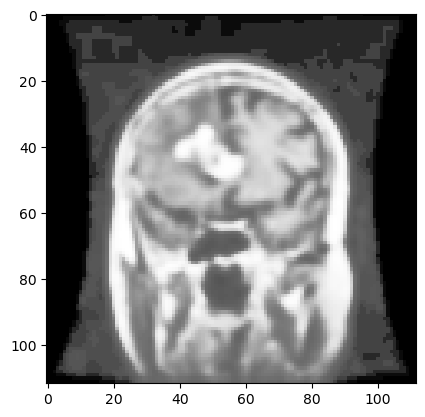

True: 0
Pred: 0


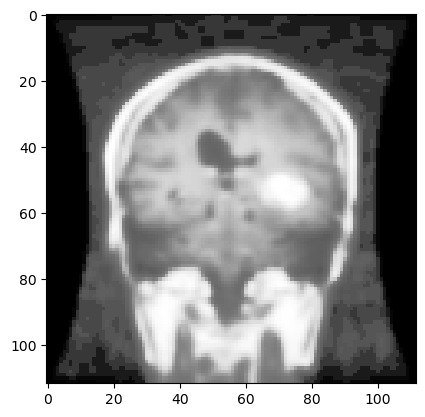

True: 0
Pred: 0


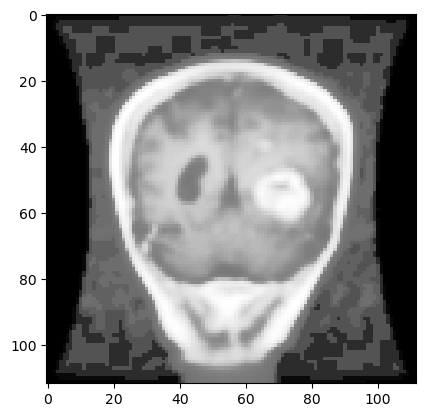

True: 0
Pred: 0


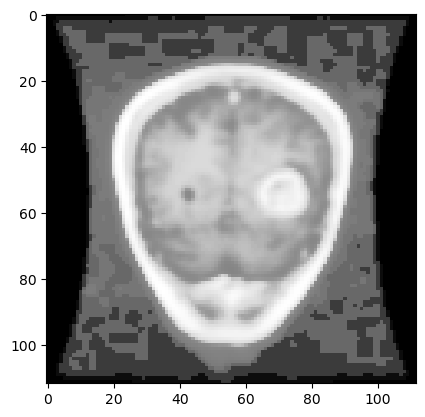

True: 0
Pred: 0


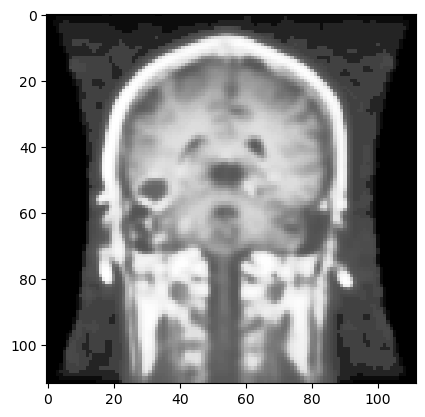

True: 0
Pred: 0


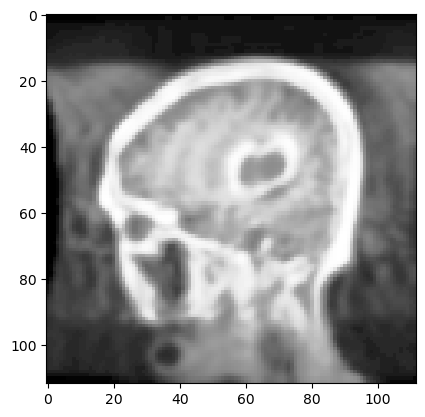

True: 0
Pred: 0


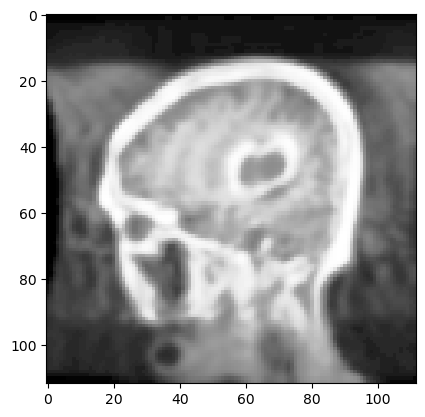

True: 0
Pred: 0


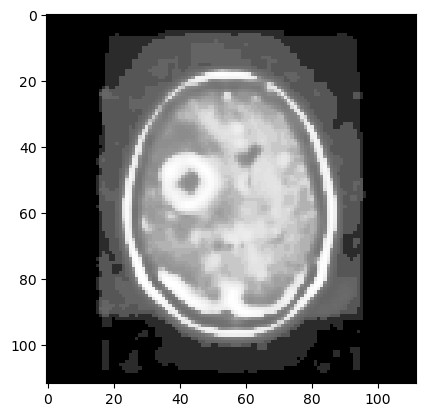

True: 0
Pred: 0


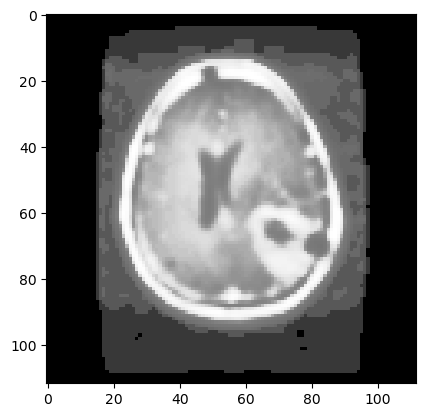

True: 0
Pred: 0


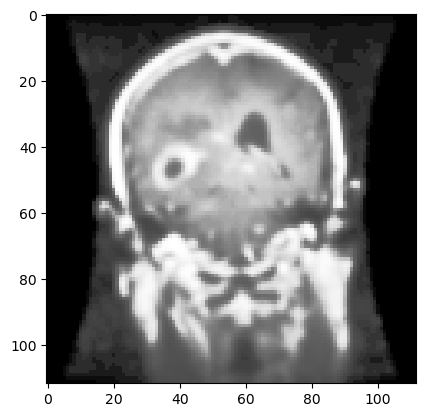

True: 0
Pred: 0


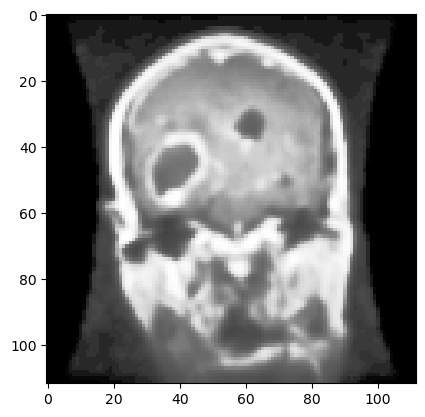

True: 0
Pred: 0


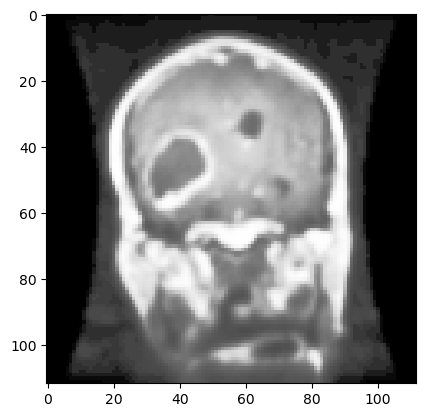

True: 0
Pred: 0


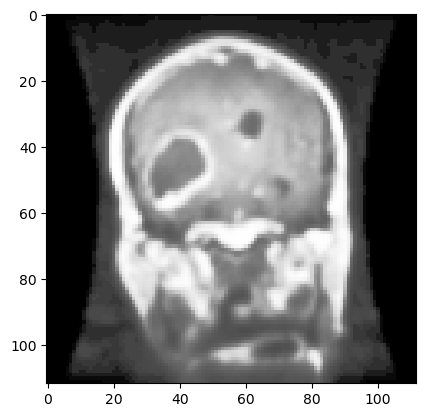

True: 0
Pred: 0


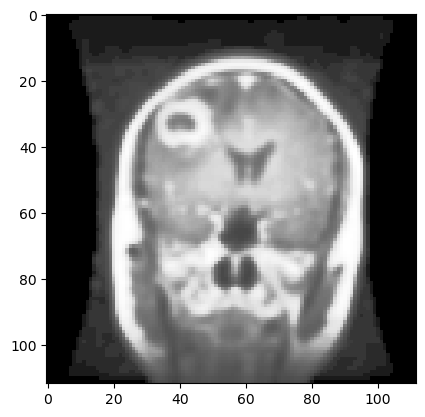

True: 0
Pred: 0


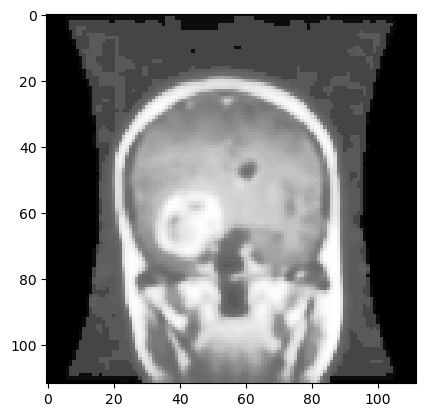

True: 0
Pred: 0


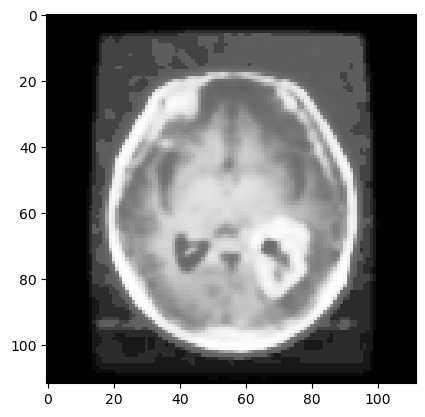

True: 0
Pred: 0


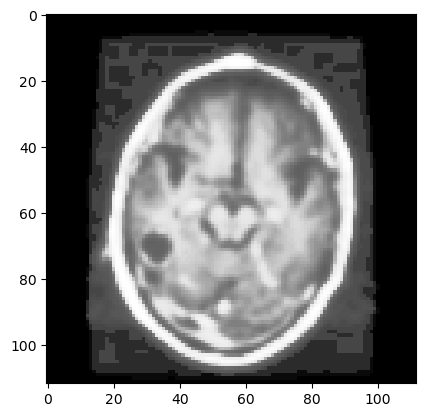

True: 0
Pred: 0


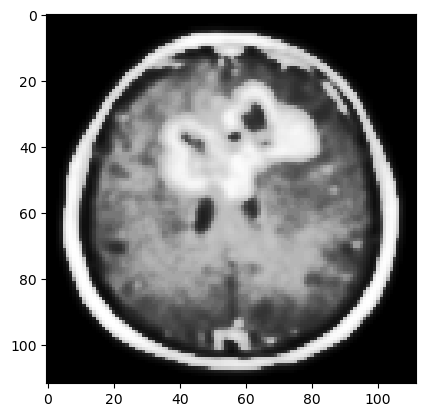

In [11]:
prediction = np.argmax(model(X_test, False), axis=1)
for i in range(100):
    if (Y_test[i] == 0 and prediction[i] == 0):
    # Show the tensor as an image using Matplotlib
        print('True:', Y_test[i].numpy()[0])
        print('Pred:', prediction[i])
        plt.imshow(X_test[i], cmap='gray')
        plt.show()